In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

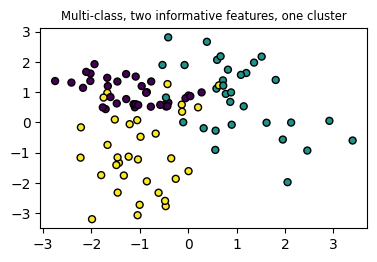

In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_classification, make_gaussian_quantiles

plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)



plt.subplot(324)
plt.title("Multi-class, two informative features, one cluster", fontsize="small")
X, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3
)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

# plt.subplot(325)
# plt.title("Three blobs", fontsize="small")
# X, Y1 = make_blobs(n_features=2, centers=3)
# plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

# plt.subplot(326)
# plt.title("Gaussian divided into three quantiles", fontsize="small")
# X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
# plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

plt.show()

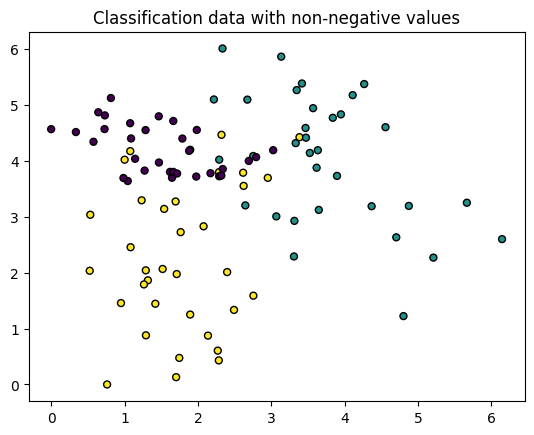

In [ ]:
# Сдвиг данных, чтобы все значения стали неотрицательными
X1 = X - np.min(X, axis=0)

# Визуализация данных
plt.scatter(X1[:, 0], X1[:, 1], c=Y1, s=25, edgecolor="k")
plt.title("Classification data with non-negative values")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, stratify=Y1, random_state=42)
sk_nb_clf = GaussianNB()
sk_nb_clf.fit(X_train, y_train)
sk_nb_clf_pred_res = sk_nb_clf.predict(X_test)
sk_nb_clf_accuracy = accuracy_score(y_test, sk_nb_clf_pred_res)

print(f'sk Naive Bayes classifier accucacy: {sk_nb_clf_accuracy}')
# print(sk_nb_clf_pred_res)


sk Naive Bayes classifier accucacy: 0.9


In [ ]:
X1_categorical = np.round(X1).astype(int)  # Преобразуем к целым числам
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X1_categorical, Y1, test_size=0.2, stratify=Y1, random_state=42)


In [ ]:
from sklearn.naive_bayes import CategoricalNB
categorical_clf = CategoricalNB()
categorical_clf.fit(X_train_cat, y_train_cat)
categorical_clf_pred_res = categorical_clf.predict(X_test_cat)
categorical_clf_accuracy = accuracy_score(y_test, categorical_clf_pred_res)

print(f'sk Categorical Naive Bayes classifier accucacy: {categorical_clf_accuracy}')
# print(categorical_clf_pred_res)

sk Categorical Naive Bayes classifier accucacy: 0.85


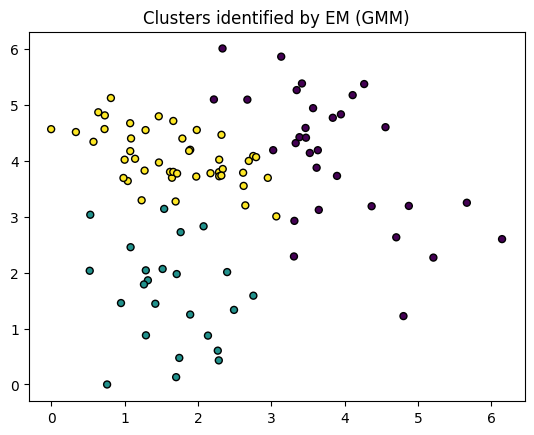

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X1)

labels = gmm.predict(X1)

plt.scatter(X1[:, 0], X1[:, 1], c=labels, s=25, edgecolor="k", cmap='viridis')
plt.title("Clusters identified by EM (GMM)")
plt.show()



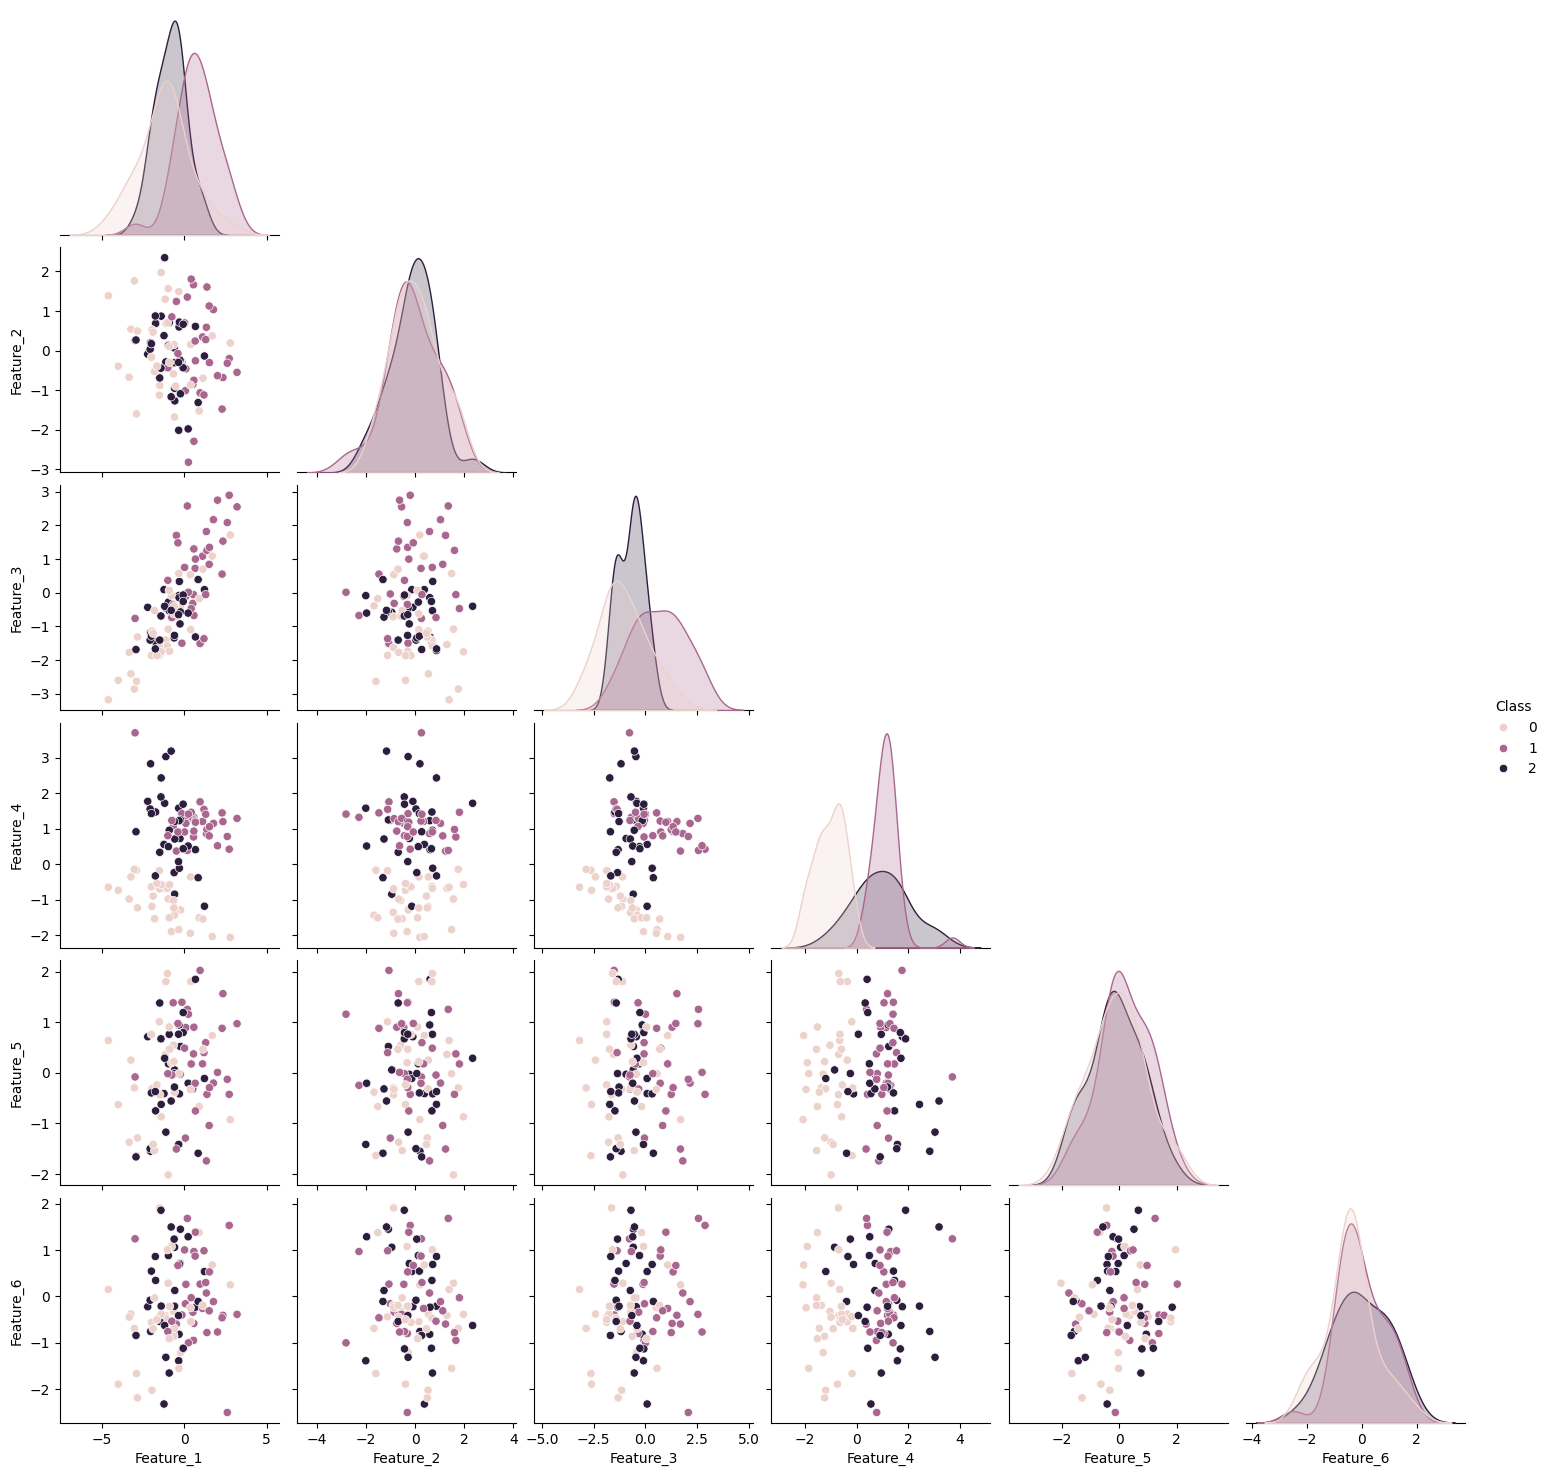

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt


X1_new, y_new = make_classification(n_features=6, n_redundant=0, n_informative=3, n_clusters_per_class=1, n_classes=3)

# Визуализация попарных распределений признаков
df = pd.DataFrame(X1_new, columns=[f'Feature_{i+1}' for i in range(X1_new.shape[1])])
df['Class'] = y_new
sns.pairplot(df, hue='Class', diag_kind='kde', corner=True)

sk Naive Bayes classifier accuracy: 0.9
sk Categorical Naive Bayes classifier accuracy: 0.8


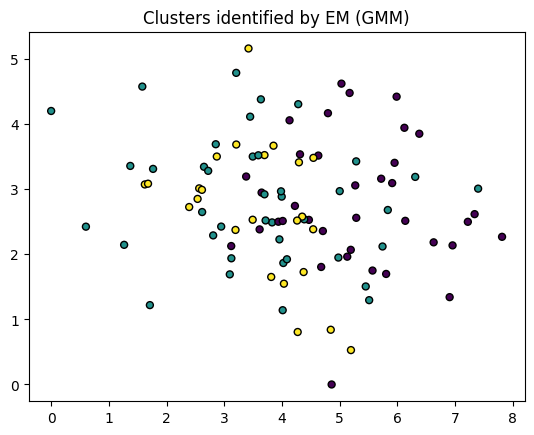

In [ ]:
X_new = X1_new - np.min(X1_new, axis = 0)

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, stratify=y_new, random_state=42)

sk_nb_clf = GaussianNB()
sk_nb_clf.fit(X_train_new, y_train_new)
sk_nb_clf_pred_res = sk_nb_clf.predict(X_test_new)
sk_nb_clf_accuracy = accuracy_score(y_test_new, sk_nb_clf_pred_res)
print(f'sk Naive Bayes classifier accuracy: {sk_nb_clf_accuracy}')
# print(sk_nb_clf_pred_res)

X_new_categorical = np.round(X_new).astype(int)  # Преобразуем к целым числам
X_train_new_cat, X_test_new_cat, y_train_new_cat, y_test_new_cat = train_test_split(X_new_categorical, y_new, test_size=0.2, stratify = y_new, random_state=42)

categorical_clf = CategoricalNB()
categorical_clf.fit(X_train_new_cat, y_train_new)
categorical_clf_pred_res = categorical_clf.predict(X_test_new_cat)
categorical_clf_accuracy = accuracy_score(y_test_new, categorical_clf_pred_res)
print(f'sk Categorical Naive Bayes classifier accuracy: {categorical_clf_accuracy}')
# print(categorical_clf_pred_res)

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_new)

labels = gmm.predict(X_new)

plt.scatter(X_new[:, 0], X_new[:, 1], c=labels, s=25, edgecolor="k", cmap='viridis')
plt.title("Clusters identified by EM (GMM)")
plt.show()


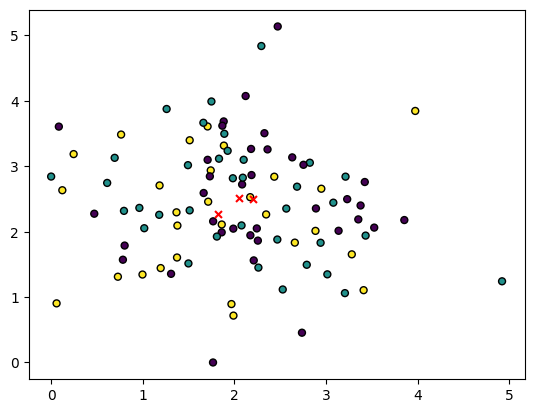

In [ ]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=labels, s=25, edgecolor="k", cmap='viridis')
plt.scatter(gmm.means_[:, 0], gmm.means_[:,1], s = 25, c = 'red', marker = 'x')
plt.show()

# **Наивный** **Байес**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

class NaiveBayes:
    def fit(self, X, y):
        classes, cls_counts = np.unique(y, return_counts=True)
        n_classes = len(classes)
        self.priors = cls_counts / len(y)

        # calculate the mean and standard deviations of features by classes
        self.X_cls_mean = np.array([np.mean(X[y == c], axis=0) for c in range(n_classes)])
        self.X_stds = np.array([np.std(X[y == c], axis=0) for c in range(n_classes)])

    # calculate the probability density of the feature according to the Gaussian distribution
    def pdf(self, x, mean, std):
        return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)

    def predict(self, X):
        pdfs = np.array([self.pdf(x, self.X_cls_mean, self.X_stds) for x in X])
        posteriors = self.priors * np.prod(pdfs, axis=2)   # shorten Bayes formula

        return np.argmax(posteriors, axis=1)
        return np.argmax(posteriors, axis=1)

# X, y = make_classification(n_features=6, n_informative=3, n_redundant=0, n_clusters_per_class=1, random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, stratify=y, random_state=42)

nb = NaiveBayes()
nb.fit(X_train_new, y_train_new)
y_pred_custom = nb.predict(X_test_new)
custom_accuracy = accuracy_score(y_test_new, y_pred_custom)
print(f'Naive Bayes accuracy: {custom_accuracy}')

from sklearn.naive_bayes import GaussianNB
sk_nb_clf = GaussianNB()
sk_nb_clf.fit(X_train_new, y_train_new)
y_pred_sklearn = sk_nb_clf.predict(X_test_new)
sklearn_accuracy = accuracy_score(y_test_new, y_pred_sklearn)
print(f'Sklearn Naive Bayes accuracy: {sklearn_accuracy}')


Naive Bayes accuracy: 0.9
Sklearn Naive Bayes accuracy: 0.9
